# Predictive Analytics for Retail Banking

Analytics is helping the banking industry become smarter in managing the myriad challenges.

Challenges:
- What is a suitable product to recommend to a customer?
- What is the best time to market the product?
- Which is the most effective channel to contact a customer?

The data is related with direct marketing campaigns of a banking institution. The marketing campaigns were based on phone alls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
The goal is to predict if the client will subscribe a term deposit

In [1]:
# Import all required libraries for reading data, analysing and visualizing data

import numpy as np
import pandas as pd

In [2]:
# Read the training & test data
# data = pd.read_csv("bank.csv")

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_6f3a3d497e084ad9aa44caf3297f8b8a = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='RdKF5a8Kq9yy4FrND9hxAL6GXSlvWlGwM_IAAcmp4DOd',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_6f3a3d497e084ad9aa44caf3297f8b8a.get_object(Bucket='retailbanking-donotdelete-pr-qepbmndlibmkie',Key='bank.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)

In [3]:
# Top 5 rows of the dataset

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
data['default'].replace(['yes','no'],[1,0],inplace=True)
data['housing'].replace(['yes','no'],[1,0],inplace=True)
data['loan'].replace(['yes','no'],[1,0],inplace=True)
data['deposit'].replace(['yes','no'],[1,0],inplace=True)

In [5]:
data["month"].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [6]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1


In [7]:
data=data.rename(columns={'default':'defaulter','previous':'prev'})

In [8]:
data["job"].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid', 'unknown',
       'self-employed', 'student'], dtype=object)

In [9]:
data

,age,job,marital,education,defaulter,balance,housing,loan,contact,day,month,duration,campaign,pdays,prev,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1
5,42,management,single,tertiary,0,0,1,1,unknown,5,may,562,2,-1,0,unknown,1
6,56,management,married,tertiary,0,830,1,1,unknown,6,may,1201,1,-1,0,unknown,1
7,60,retired,divorced,secondary,0,545,1,0,unknown,6,may,1030,1,-1,0,unknown,1
8,37,technician,married,secondary,0,1,1,0,unknown,6,may,608,1,-1,0,unknown,1
9,28,services,single,secondary,0,5090,1,0,unknown,6,may,1297,3,-1,0,unknown,1


In [10]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
defaulter    0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
prev         0
poutcome     0
deposit      0
dtype: int64

In [11]:
data.describe()

,age,defaulter,balance,housing,loan,day,duration,campaign,pdays,prev,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,0.015051,1528.538524,0.473123,0.130801,15.658036,371.993818,2.508421,51.330407,0.832557,0.473840
std,11.913369,0.121761,3225.413326,0.499299,0.337198,8.420740,347.128386,2.722077,108.758282,2.292007,0.499338
min,18.000000,0.000000,-6847.000000,0.000000,0.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,0.000000,122.000000,0.000000,0.000000,8.000000,138.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,550.000000,0.000000,0.000000,15.000000,255.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,0.000000,1708.000000,1.000000,0.000000,22.000000,496.000000,3.000000,20.750000,1.000000,1.000000
max,95.000000,1.000000,81204.000000,1.000000,1.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,1.000000


In [12]:
# To get a concise summary of the dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
defaulter    11162 non-null int64
balance      11162 non-null int64
housing      11162 non-null int64
loan         11162 non-null int64
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
prev         11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null int64
dtypes: int64(11), object(6)
memory usage: 1.4+ MB


In [13]:
data.cov()

,age,defaulter,balance,housing,loan,day,duration,campaign,pdays,prev,deposit
age,141.928366,-0.016573,4.315184e+03,-1.003487,-0.126211,-0.076486,0.782547,-0.171159,3.593995,0.550713,0.207618
defaulter,-0.016573,0.014826,-2.393849e+01,0.000673,0.003138,0.017781,-0.412504,0.010267,-0.480468,-0.009844,-0.002473
balance,4315.183833,-23.938489,1.040329e+07,-124.152669,-91.998857,284.299484,25120.222216,-121.985317,6107.664002,227.733044,130.663269
housing,-1.003487,0.000673,-1.241527e+02,0.249300,0.012924,-0.062099,6.075051,0.009052,3.502385,-0.000962,-0.050833
loan,-0.126211,0.003138,-9.199886e+01,0.012924,0.113702,0.049034,-0.223992,0.031870,-1.115437,-0.017519,-0.018619
day,-0.076486,0.017781,2.842995e+02,-0.062099,0.049034,70.908854,-54.110259,3.140457,-70.730655,-1.138351,-0.236838
duration,0.782547,-0.412504,2.512022e+04,6.075051,-0.223992,-54.110259,120498.116170,-39.268069,-1034.115689,-21.255941,78.333097
campaign,-0.171159,0.010267,-1.219853e+02,0.009052,0.031870,3.140457,-39.268069,7.409704,-30.411886,-0.310076,-0.174092
pdays,3.593995,-0.480468,6.107664e+03,3.502385,-1.115437,-70.730655,-1034.115689,-30.411886,11828.363897,126.450007,8.232549
prev,0.550713,-0.009844,2.277330e+02,-0.000962,-0.017519,-1.138351,-21.255941,-0.310076,126.450007,5.253297,0.160076


In [14]:
data.corr()

,age,defaulter,balance,housing,loan,day,duration,campaign,pdays,prev,deposit
age,1.000000,-0.011425,0.112300,-0.168700,-0.031418,-0.000762,0.000189,-0.005278,0.002774,0.020169,0.034901
defaulter,-0.011425,1.000000,-0.060954,0.011076,0.076434,0.017342,-0.009760,0.030975,-0.036282,-0.035273,-0.040680
balance,0.112300,-0.060954,1.000000,-0.077092,-0.084589,0.010467,0.022436,-0.013894,0.017411,0.030805,0.081129
housing,-0.168700,0.011076,-0.077092,1.000000,0.076761,-0.014770,0.035051,0.006660,0.064497,-0.000840,-0.203888
loan,-0.031418,0.076434,-0.084589,0.076761,1.000000,0.017269,-0.001914,0.034722,-0.030416,-0.022668,-0.110580
day,-0.000762,0.017342,0.010467,-0.014770,0.017269,1.000000,-0.018511,0.137007,-0.077232,-0.058981,-0.056326
duration,0.000189,-0.009760,0.022436,0.035051,-0.001914,-0.018511,1.000000,-0.041557,-0.027392,-0.026716,0.451919
campaign,-0.005278,0.030975,-0.013894,0.006660,0.034722,0.137007,-0.041557,1.000000,-0.102726,-0.049699,-0.128081
pdays,0.002774,-0.036282,0.017411,0.064497,-0.030416,-0.077232,-0.027392,-0.102726,1.000000,0.507272,0.151593
prev,0.020169,-0.035273,0.030805,-0.000840,-0.022668,-0.058981,-0.026716,-0.049699,0.507272,1.000000,0.139867


In [15]:
data.pivot_table(data,index="job")

,age,balance,campaign,day,defaulter,deposit,duration,housing,loan,pdays,prev
job,,,,,,,,,,,
admin.,39.374063,1195.866567,2.376312,15.340330,0.008246,0.473013,347.929535,0.554723,0.176912,64.338831,0.973763
blue-collar,39.505144,1203.926440,2.541152,15.235597,0.021091,0.364198,394.658951,0.679527,0.173354,44.061214,0.633230
entrepreneur,42.887195,1621.942073,2.725610,15.442073,0.030488,0.375000,370.182927,0.506098,0.213415,32.746951,0.536585
housemaid,47.445255,1366.160584,2.689781,16.364964,0.029197,0.397810,348.346715,0.277372,0.072993,33.540146,0.503650
management,40.218239,1793.663679,2.588075,15.792284,0.015199,0.507015,361.482073,0.418161,0.101325,54.456352,0.925175
retired,65.424165,2417.250643,2.131105,15.519280,0.006427,0.663239,389.993573,0.158098,0.070694,53.003856,0.994859
self-employed,39.809877,1865.372840,2.533333,15.938272,0.019753,0.461728,396.155556,0.429630,0.138272,45.039506,0.804938
services,38.141928,1081.171181,2.576381,15.728061,0.007584,0.399783,385.955580,0.613218,0.166847,51.546046,0.684724
student,26.102778,1500.783333,2.169444,15.175000,0.002778,0.747222,330.672222,0.141667,0.002778,68.683333,1.297222


In [16]:
data.pivot_table(data,index='month')

,age,balance,campaign,day,defaulter,deposit,duration,housing,loan,pdays,prev
month,,,,,,,,,,,
apr,40.247021,1734.264355,1.833153,18.630553,0.007584,0.625135,398.721560,0.517876,0.087757,80.005417,0.980498
aug,42.826860,1580.872943,3.514812,15.494404,0.013825,0.452930,352.072416,0.183673,0.078999,32.930217,0.624753
dec,45.745455,2735.209091,2.181818,14.481818,0.000000,0.909091,397.054545,0.181818,0.027273,113.172727,2.218182
feb,41.943299,1568.166237,2.155928,8.541237,0.006443,0.568299,343.125000,0.324742,0.117268,72.426546,1.304124
jan,42.345930,1151.093023,1.729651,25.773256,0.017442,0.412791,349.482558,0.235465,0.136628,62.619186,1.290698
jul,41.123514,1061.122193,3.294584,18.407530,0.030383,0.414135,418.867239,0.440555,0.268164,24.017834,0.363276
jun,41.539280,1601.206219,2.853519,11.293781,0.021277,0.446809,364.742226,0.364975,0.114566,21.918167,0.505728
mar,43.427536,2118.605072,2.003623,13.438406,0.000000,0.898551,291.369565,0.224638,0.047101,66.322464,1.242754
may,38.728754,1192.357649,2.328258,15.510623,0.014873,0.327550,378.363669,0.839589,0.134207,56.211402,0.734065


In [17]:
data.pivot_table(data,index='marital')

,age,balance,campaign,day,defaulter,deposit,duration,housing,loan,pdays,prev
marital,,,,,,,,,,,
divorced,47.365043,1371.835267,2.457077,15.689869,0.021655,0.481052,392.481825,0.483372,0.155452,46.651199,0.664346
married,44.533617,1599.927570,2.621477,15.678791,0.014328,0.433790,361.063769,0.488899,0.143757,49.505432,0.822233
single,33.017339,1457.255259,2.323195,15.608869,0.013928,0.543491,384.195566,0.440875,0.098351,56.344798,0.913019


In [18]:
data.pivot_table(data,index='education')

,age,balance,campaign,day,defaulter,deposit,duration,housing,loan,pdays,prev
education,,,,,,,,,,,
primary,48.220667,1523.031333,2.646000,15.510667,0.019333,0.394000,383.803333,0.494667,0.136667,39.976667,0.688000
secondary,40.086012,1296.480278,2.470051,15.568846,0.014974,0.447407,373.344960,0.533419,0.158145,53.302045,0.821768
tertiary,39.513147,1845.869070,2.487395,15.782597,0.013012,0.541068,368.627812,0.391434,0.098401,53.120629,0.924370
unknown,45.523139,1746.605634,2.672032,16.160966,0.018109,0.507042,346.448692,0.350101,0.052314,50.585513,0.706237


In [19]:
data['deposit'].value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

# EDA

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,0,'balance')

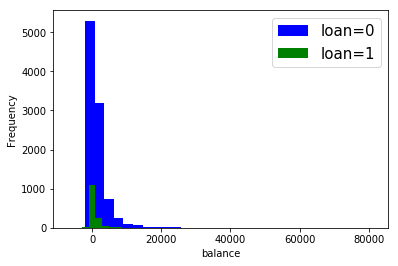

In [21]:
data[data['loan']==0]['balance'].plot.hist(bins=30,color='blue', label='loan=0')
data[data['loan']==1]['balance'].plot.hist(bins=30, color='green', label='loan=1')
plt.legend(fontsize=15)
plt.xlabel("balance")

Text(0.5,0,'age')

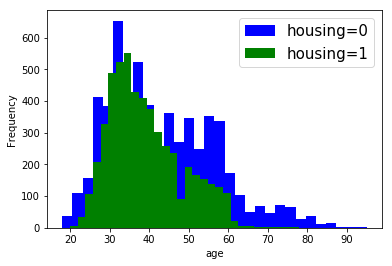

In [22]:
data[data['housing']==0]['age'].plot.hist(bins=30,color='blue', label='housing=0')
data[data['housing']==1]['age'].plot.hist(bins=30, color='green', label='housing=1')
plt.legend(fontsize=15)
plt.xlabel("age")

Text(0.5,0,'duration')

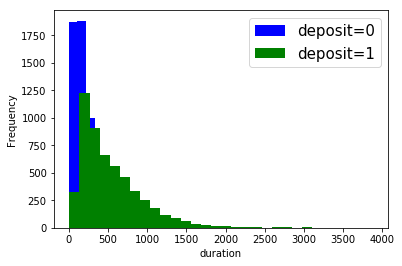

In [23]:
data[data['deposit']==0]['duration'].plot.hist(bins=30,color='blue', label='deposit=0')
data[data['deposit']==1]['duration'].plot.hist(bins=30, color='green', label='deposit=1')
plt.legend(fontsize=15)
plt.xlabel("duration")

Text(0,0.5,'balance')

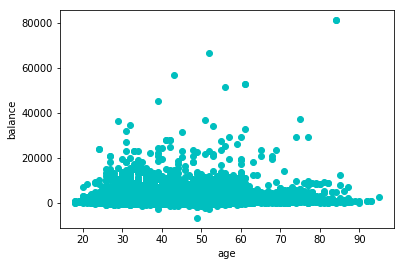

In [24]:
%matplotlib inline
plt.scatter(data["age"],data["balance"],color="c")
plt.xlabel("age")
plt.ylabel("balance")

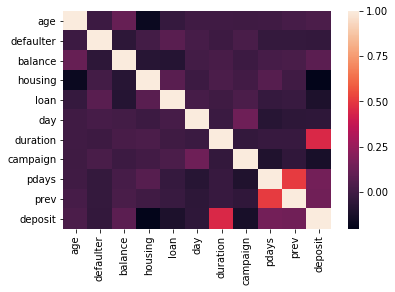

In [25]:
import seaborn as sns
sns.heatmap(data.corr())

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5,0,'month')

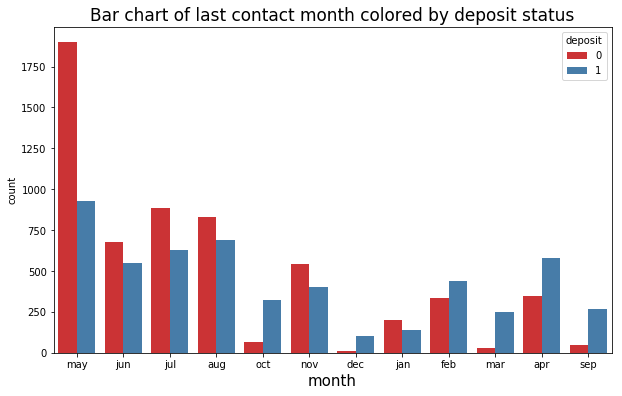

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x='month',hue='deposit', data=data,palette='Set1')
plt.title("Bar chart of last contact month colored by deposit status", fontsize=17)
plt.xlabel("month", fontsize=15)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5,0,'contact')

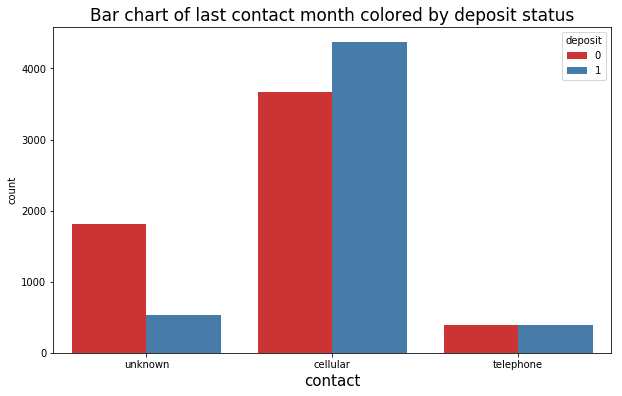

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(x='contact',hue='deposit', data=data,palette='Set1')
plt.title("Bar chart of last contact month colored by deposit status", fontsize=17)
plt.xlabel("contact", fontsize=15)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5,0,'marital')

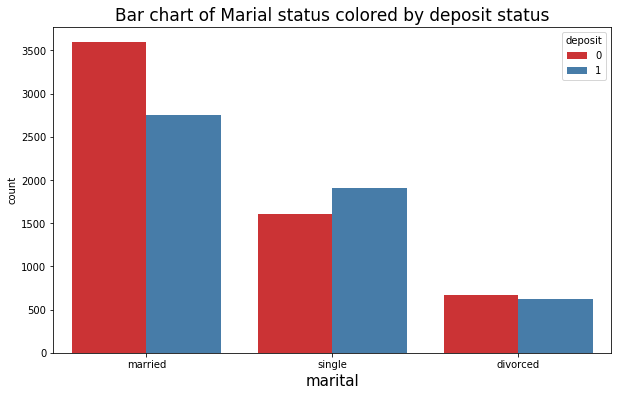

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(x='marital',hue='deposit', data=data,palette='Set1')
plt.title("Bar chart of Marial status colored by deposit status", fontsize=17)
plt.xlabel("marital", fontsize=15)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5,0,'poutcome')

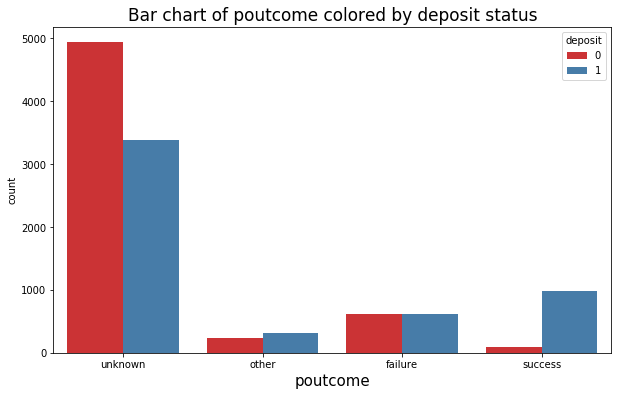

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(x='poutcome',hue='deposit', data=data,palette='Set1')
plt.title("Bar chart of poutcome colored by deposit status", fontsize=17)
plt.xlabel("poutcome", fontsize=15)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5,0,'education')

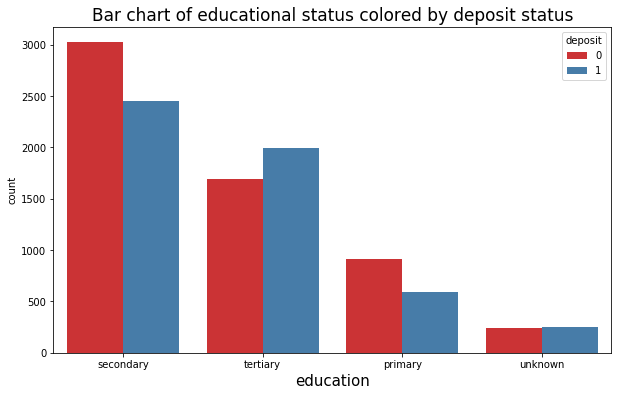

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(x='education',hue='deposit', data=data,palette='Set1')
plt.title("Bar chart of educational status colored by deposit status", fontsize=17)
plt.xlabel("education", fontsize=15)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5,0,'job')

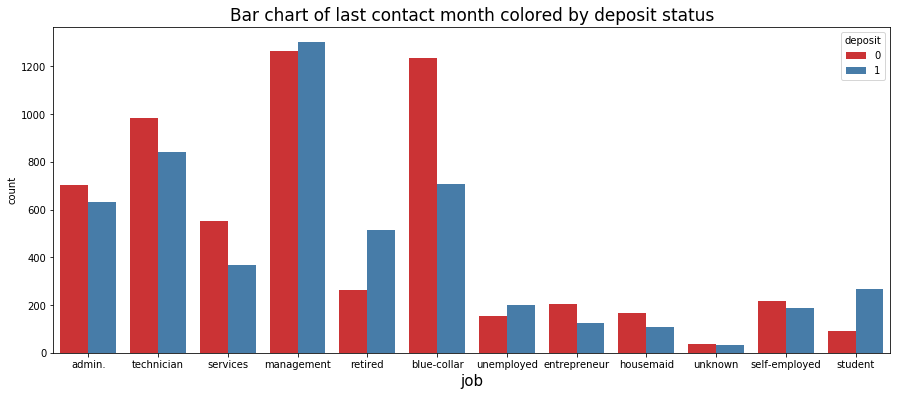

In [31]:
plt.figure(figsize=(15,6))
sns.countplot(x='job',hue='deposit', data=data,palette='Set1')
plt.title("Bar chart of last contact month colored by deposit status", fontsize=17)
plt.xlabel("job", fontsize=15)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0,0.5,'Duration')

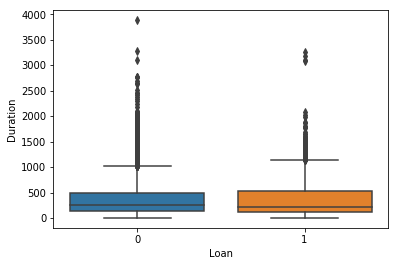

In [32]:
sns.boxplot(x=data['loan'],y=data['duration'])
plt.xlabel("Loan")
plt.ylabel("Duration")

In [33]:
data["pdays"].replace(-1,int(0),inplace=True)
data.head()   

,age,job,marital,education,defaulter,balance,housing,loan,contact,day,month,duration,campaign,pdays,prev,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,0,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,0,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,0,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,0,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,0,0,unknown,1


In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.iloc[:,1]=le.fit_transform(data.iloc[:,1])
data.iloc[:,2]=le.fit_transform(data.iloc[:,2])
data.iloc[:,3]=le.fit_transform(data.iloc[:,3])
data.iloc[:,8]=le.fit_transform(data.iloc[:,8])
data.iloc[:,10]=le.fit_transform(data.iloc[:,10])
data.iloc[:,15]=le.fit_transform(data.iloc[:,15])
data

,age,job,marital,education,defaulter,balance,housing,loan,contact,day,month,duration,campaign,pdays,prev,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,0,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,0,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,0,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,0,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,0,0,3,1
5,42,4,2,2,0,0,1,1,2,5,8,562,2,0,0,3,1
6,56,4,1,2,0,830,1,1,2,6,8,1201,1,0,0,3,1
7,60,5,0,1,0,545,1,0,2,6,8,1030,1,0,0,3,1
8,37,9,1,1,0,1,1,0,2,6,8,608,1,0,0,3,1
9,28,7,2,1,0,5090,1,0,2,6,8,1297,3,0,0,3,1


In [35]:
data['job'].unique()

array([ 0,  9,  7,  4,  5,  1, 10,  2,  3, 11,  6,  8])

In [36]:
data['marital'].unique()

array([1, 2, 0])

In [37]:
data['education'].unique()

array([1, 2, 0, 3])

In [38]:
data['contact'].unique()

array([2, 0, 1])

In [39]:
data['month'].unique()

array([ 8,  6,  5,  1, 10,  9,  2,  4,  3,  7,  0, 11])

In [40]:
data['poutcome'].unique()

array([3, 1, 0, 2])

In [41]:
X=data.drop(columns=["day","deposit"])
Y=data["deposit"]

In [42]:
X

,age,job,marital,education,defaulter,balance,housing,loan,contact,month,duration,campaign,pdays,prev,poutcome
0,59,0,1,1,0,2343,1,0,2,8,1042,1,0,0,3
1,56,0,1,1,0,45,0,0,2,8,1467,1,0,0,3
2,41,9,1,1,0,1270,1,0,2,8,1389,1,0,0,3
3,55,7,1,1,0,2476,1,0,2,8,579,1,0,0,3
4,54,0,1,2,0,184,0,0,2,8,673,2,0,0,3
5,42,4,2,2,0,0,1,1,2,8,562,2,0,0,3
6,56,4,1,2,0,830,1,1,2,8,1201,1,0,0,3
7,60,5,0,1,0,545,1,0,2,8,1030,1,0,0,3
8,37,9,1,1,0,1,1,0,2,8,608,1,0,0,3
9,28,7,2,1,0,5090,1,0,2,8,1297,3,0,0,3


In [43]:
Y

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
11132    0
11133    0
11134    0
11135    0
11136    0
11137    0
11138    0
11139    0
11140    0
11141    0
11142    0
11143    0
11144    0
11145    0
11146    0
11147    0
11148    0
11149    0
11150    0
11151    0
11152    0
11153    0
11154    0
11155    0
11156    0
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

# preprocessing the data

In [44]:
from sklearn import preprocessing
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(X).transform(X)

array([[ 0.53246753,  0.        ,  0.5       , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.49350649,  0.        ,  0.5       , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.2987013 ,  0.81818182,  0.5       , ...,  0.        ,
         0.        ,  1.        ],
       ..., 
       [ 0.18181818,  0.81818182,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.32467532,  0.81818182,  0.5       , ...,  0.20140515,
         0.0862069 ,  0.        ],
       [ 0.20779221,  0.81818182,  0.5       , ...,  0.        ,
         0.        ,  1.        ]])

# Train Test Split

In [45]:
#Splitting the dataset into Training set and Test set
from sklearn import model_selection, neighbors
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [46]:
X_train

,age,job,marital,education,defaulter,balance,housing,loan,contact,month,duration,campaign,pdays,prev,poutcome
7618,26,1,1,1,0,557,1,1,2,8,282,2,0,0,3
3814,68,5,1,2,0,2812,0,0,0,1,651,1,1,7,2
42,45,2,0,2,0,-395,1,0,2,8,470,1,0,0,3
7300,28,8,2,1,0,154,1,0,2,8,21,9,0,0,3
10484,51,9,1,1,0,2682,0,0,2,6,56,1,0,0,3
8872,32,4,1,2,0,663,0,1,0,5,62,3,0,0,3
8291,26,4,1,2,0,775,0,0,2,8,35,3,0,0,3
1123,59,5,2,1,0,2,0,0,1,3,935,1,0,0,3
872,44,4,1,2,0,1138,0,0,0,1,523,3,0,0,3
10910,48,9,1,1,0,197,0,1,0,3,47,2,222,3,1


In [47]:
Y_train

7618     0
3814     1
42       1
7300     0
10484    0
8872     0
8291     0
1123     1
872      1
10910    0
2113     1
10202    0
1818     1
153      1
720      1
1549     1
8948     0
6155     0
6506     0
4272     1
7447     0
9481     0
9378     0
4221     1
2025     1
6452     0
4861     1
4869     1
6468     0
1790     1
        ..
7579     0
8831     0
6205     0
1334     1
9959     0
7227     0
4310     1
2765     1
3614     1
6929     0
3431     1
5006     1
4502     1
5730     0
3559     1
6545     0
11099    0
143      1
3409     1
2391     1
10234    0
9096     0
9800     0
15       1
3856     1
7697     0
6815     0
3021     1
930      1
4779     1
Name: deposit, Length: 8929, dtype: int64

In [48]:
X_test

,age,job,marital,education,defaulter,balance,housing,loan,contact,month,duration,campaign,pdays,prev,poutcome
8244,60,9,1,2,0,91,0,0,0,1,105,4,0,0,3
1526,40,7,2,1,0,224,1,0,0,0,875,2,0,0,3
10398,29,4,2,2,0,502,0,0,0,0,366,2,199,3,1
6916,33,1,2,1,0,-14,1,0,0,8,223,2,0,0,3
3083,32,0,1,1,0,366,0,0,0,4,366,2,0,0,3
10815,38,10,1,1,0,995,0,0,2,5,84,1,0,0,3
1786,35,2,1,1,0,2971,0,0,0,8,429,4,164,2,0
2842,30,0,2,1,0,914,1,0,0,10,524,3,272,1,0
10334,56,4,1,0,0,7747,0,0,2,6,103,2,0,0,3
5002,73,5,1,0,0,5539,0,0,1,1,338,1,0,0,3


In [49]:
Y_test

8244     0
1526     1
10398    0
6916     0
3083     1
10815    0
1786     1
2842     1
10334    0
5002     1
2410     1
10490    0
3700     1
6430     0
10667    0
1560     1
4766     1
2966     1
490      1
7479     0
8747     0
331      1
10650    0
10869    0
5248     1
7078     0
8622     0
10734    0
3397     1
9180     0
        ..
2968     1
2412     1
4371     1
7320     0
7985     0
4476     1
3078     1
8814     0
6111     0
6508     0
9058     0
7607     0
3730     1
8241     0
4064     1
4829     1
9393     0
6360     0
9040     0
3786     1
2128     1
3196     1
9914     0
1357     1
9662     0
4945     1
7222     0
20       1
3239     1
825      1
Name: deposit, Length: 2233, dtype: int64

# KNN classifier

In [50]:
#Fitting Classifier to the Training set
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [51]:
Y_pred=clf.predict(X_test)

In [52]:
print('Actual Deposit ')
print(Y_test.values)

Actual Deposit 
[0 1 0 ..., 1 1 1]


In [53]:
print('Predicted Deposit')
print(Y_pred)

Predicted Deposit
[0 1 1 ..., 1 1 1]


In [54]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

knn_acc=accuracy_score(Y_test,Y_pred) * 100
print("\nAccuracy score: %f" %(accuracy_score(Y_test,Y_pred) * 100))
print("Recall score : %f" %(recall_score(Y_test, Y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(Y_test, Y_pred) * 100))
print(confusion_matrix(Y_test, Y_pred)) 




Accuracy score: 76.533811
Recall score : 74.095238
ROC score : 76.396731

[[931 252]
 [272 778]]


In [55]:

#Predict the probability of each test data point
#Get the probability distribution
probas = clf.predict_proba(X_test)

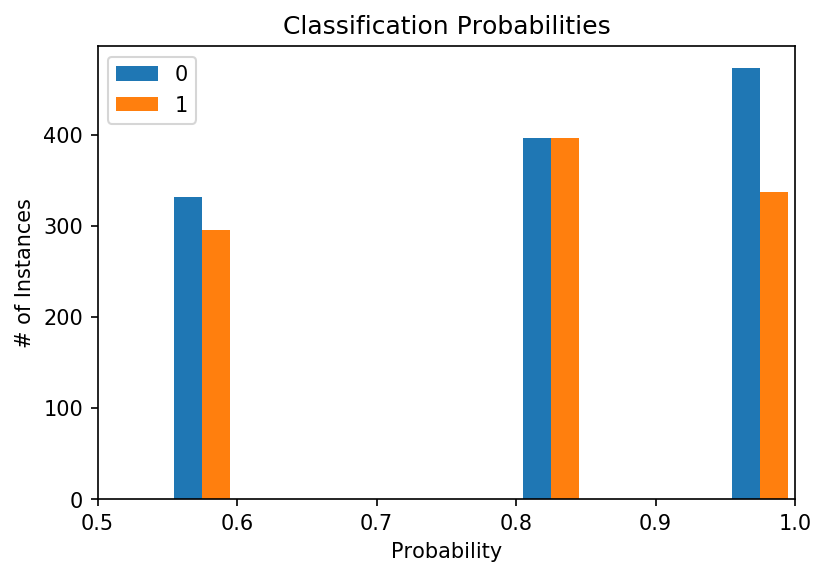

In [56]:
#Visualize the probabilities
# plot
import matplotlib.pyplot as plt
plt.figure(dpi=150)
plt.hist(probas, bins=20)
plt.title('Classification Probabilities')
plt.xlabel('Probability')
plt.ylabel('# of Instances')
plt.xlim([0.5, 1.0])
plt.legend(Y_test)
plt.show()

In [57]:
X_train_std = minmax.fit_transform(X_train)
X_test_std = minmax.transform(X_test)

In [58]:
#Evaluation Metrics
from sklearn.model_selection import cross_val_score,cross_val_predict

In [59]:
#Print cross validation score for kNN
clf_acc = cross_val_score(clf, X_train_std, Y_train, cv=3, scoring="accuracy",  n_jobs=-1)

In [60]:
clf_proba = cross_val_predict(clf, X_train_std, Y_train, cv=3, method='predict_proba')
clf_scores = clf_proba[:, 1] # get the score of the positive class 

In [61]:
clf_acc

array([ 0.7430299 ,  0.73790323,  0.74025538])

#  Logistic Regression

In [62]:
#Build a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)
lr_acc = cross_val_score(lr, X_train_std, Y_train, cv=3, scoring='accuracy', n_jobs=-1)
lr_proba = cross_val_predict(lr, X_train_std, Y_train, cv=3, method='predict_proba')
lr_scores = lr_proba[:, 1]

In [63]:
lr_acc

array([ 0.7897212 ,  0.79200269,  0.78729839])

In [64]:
#Predict on test data
Y_pred=lr.predict(X_test)

In [65]:
print('Actual Deposit ')
print(Y_test.values)

Actual Deposit 
[0 1 0 ..., 1 1 1]


In [66]:
print('Predicted Deposit')
print(Y_pred)

Predicted Deposit
[0 1 1 ..., 0 0 1]


In [67]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
acc_lr=accuracy_score(Y_test,Y_pred) * 100
print("\nAccuracy score: %f" %(accuracy_score(Y_test,Y_pred) * 100))
print("Recall score : %f" %(recall_score(Y_test, Y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(Y_test, Y_pred) * 100))
print(confusion_matrix(Y_test, Y_pred))


Accuracy score: 79.982087
Recall score : 78.666667
ROC score : 79.908143

[[960 223]
 [224 826]]


In [68]:
from sklearn.metrics import roc_auc_score,roc_curve
def ROC_curve(title, Y_train, scores, label=None):
    # calculate the ROC score
    fpr, tpr, thresholds = roc_curve(Y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(Y_train, scores)))
    
    # plot the ROC curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

# Decision Tree

In [69]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(X_train,Y_train)

#Print cross validation score for Decision Tree Calssifier
dtc_clf_acc = cross_val_score(dtc_clf, X_train_std, Y_train, cv=3, scoring="accuracy",  n_jobs=-1)
dtc_proba = cross_val_predict(dtc_clf, X_train_std, Y_train, cv=3, method='predict_proba')
dtc_clf_scores = dtc_proba[:, 1]
dtc_clf_acc

array([ 0.77729258,  0.7718414 ,  0.77318548])

In [70]:
#Predict on test data
Y_pred=dtc_clf.predict(X_test)

In [71]:
print('Actual Deposit ')
print(Y_test.values)

Actual Deposit 
[0 1 0 ..., 1 1 1]


In [72]:
print('Predicted Deposit')
print(Y_pred)

Predicted Deposit
[0 1 1 ..., 0 0 1]


In [73]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
acc_dt=accuracy_score(Y_test,Y_pred) * 100
print("\nAccuracy score: %f" %(accuracy_score(Y_test,Y_pred) * 100))
print("Recall score : %f" %(recall_score(Y_test, Y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(Y_test, Y_pred) * 100))
print(confusion_matrix(Y_test, Y_pred)) 


Accuracy score: 77.877295
Recall score : 77.428571
ROC score : 77.852071

[[926 257]
 [237 813]]


In [74]:
dtc_clf_acc

array([ 0.77729258,  0.7718414 ,  0.77318548])

# Random Forest

In [75]:
#Build Random Forest Calssifier
from sklearn.ensemble import RandomForestClassifier
rmf = RandomForestClassifier(max_depth=2, random_state=0)
rmf_clf = rmf.fit(X_train, Y_train)

In [76]:
#Print cross validation score for Random Forest Calssifier
rmf_clf_acc = cross_val_score(rmf_clf, X_train_std, Y_train, cv=3, scoring="accuracy",  n_jobs=-1)
rmf_proba = cross_val_predict(rmf_clf, X_train_std, Y_train, cv=3, method='predict_proba')
rmf_clf_scores = rmf_proba[:, 1]
rmf_clf_acc

array([ 0.75680215,  0.74798387,  0.72950269])

In [77]:
#Predict on test data
Y_pred=rmf.predict(X_test)

In [78]:
print('Actual Deposit ')
print(Y_test.values)

Actual Deposit 
[0 1 0 ..., 1 1 1]


In [79]:
print('Predicted Deposit')
print(Y_pred)

Predicted Deposit
[0 1 1 ..., 1 1 1]


In [80]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
acc_rmf=accuracy_score(Y_test,Y_pred) * 100
print("\nAccuracy score: %f" %(accuracy_score(Y_test,Y_pred) * 100))
print("Recall score : %f" %(recall_score(Y_test, Y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(Y_test, Y_pred) * 100))
print(confusion_matrix(Y_test, Y_pred)) 


Accuracy score: 75.145544
Recall score : 74.476190
ROC score : 75.107918

[[896 287]
 [268 782]]


In [81]:
acc_rmf

75.145544111061355

In [82]:
from sklearn.metrics import roc_auc_score,roc_curve
def ROC_curve(title, Y_train, scores, label=None):
    # calculate the ROC score
    fpr, tpr, thresholds = roc_curve(Y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(Y_train, scores)))
    
    # plot the ROC curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

# svm

In [83]:
# Build Support Vector Classification
from sklearn.svm import SVC
svc = SVC(kernel='rbf',probability = True)
svc_classifier = svc.fit(X_train,Y_train)

In [84]:
#Print cross validation score for SVC
svc_acc = cross_val_score(svc_classifier, X_train_std, Y_train, cv=3, scoring="accuracy",  n_jobs=-1)
svc_proba = cross_val_predict(svc_classifier, X_train_std, Y_train, cv=3, method='predict_proba')
svc_scores = svc_proba[:, 1]

In [85]:
svc_acc

array([ 0.78535438,  0.78864247,  0.78998656])

In [86]:
#Predict on test data
Y_pred=svc_classifier.predict(X_test)

In [87]:
print('Actual deposit')
print(Y_test.values)

Actual deposit
[0 1 0 ..., 1 1 1]


In [88]:
print('Predicted deposit')
print(Y_pred)

Predicted deposit
[0 0 0 ..., 0 0 0]


In [89]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
acc_svm=accuracy_score(Y_test,Y_pred) * 100
print("\nAccuracy score: %f" %(accuracy_score(Y_test,Y_pred) * 100))
print("Recall score : %f" %(recall_score(Y_test, Y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(Y_test, Y_pred) * 100))
print(confusion_matrix(Y_test, Y_pred)) 


Accuracy score: 52.843708
Recall score : 0.285714
ROC score : 49.889265

[[1177    6]
 [1047    3]]


AUC Score (kNN): 0.81 


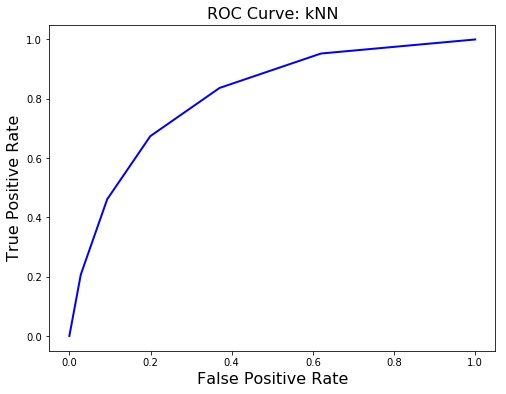

AUC Score (Logistic Regression): 0.86 


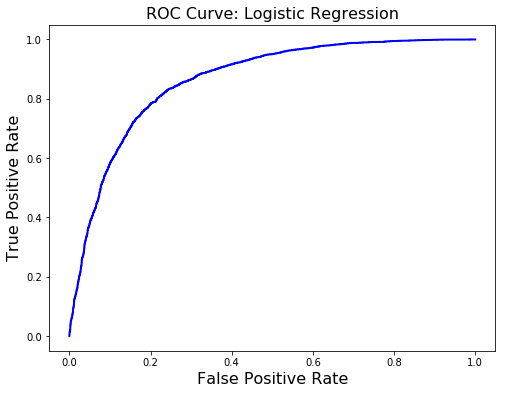

AUC Score (Support Vector Classification): 0.86 


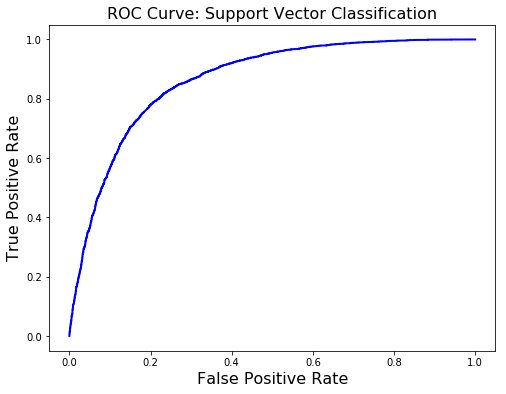

AUC Score (Decision Tree Classifier): 0.77 


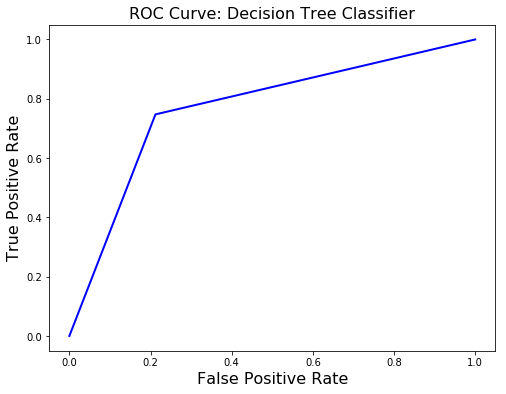

AUC Score (Random Forest Classifier): 0.82 


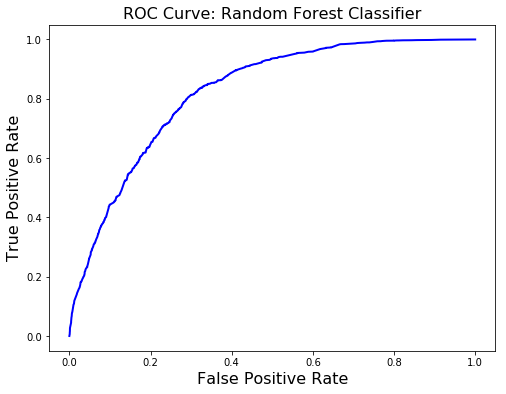

In [90]:
#Plot ROC Curve for each algorithm
ROC_curve('kNN', Y_train, clf_scores)
ROC_curve('Logistic Regression', Y_train, lr_scores)
ROC_curve('Support Vector Classification',Y_train,svc_scores)
ROC_curve('Decision Tree Classifier',Y_train,dtc_clf_scores)
ROC_curve('Random Forest Classifier',Y_train,rmf_clf_scores)

In [94]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

wml_credentials = {
   "instance_id": "3281aeea-4dc6-41cb-9f39-1f1d2b5761b8",
  "password": "2492ccc8-7ed1-434d-af69-0a170fe6a4aa",
  "url": "https://eu-gb.ml.cloud.ibm.com",
  "username": "16752374-b3a2-4623-b3f1-a91af0ff5806"
}

client = WatsonMachineLearningAPIClient(wml_credentials)
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Abhishek", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "abhishek@gmail.com", 
               client.repository.ModelMetaNames.NAME: "Bank Model"
              }

model=client.repository.store_model(lr, meta_props=model_props)

published_model_uid = client.repository.get_model_uid(model)
published_model_uid

deployment = client.deployments.create(published_model_uid, name="Retail Banking")

scoring_endpoint = client.deployments.get_scoring_url(deployment)
scoring_endpoint

ApiRequestFailure: Error during getting ML Token. (GET https://eu-gb.ml.cloud.ibm.com/v3/identity/token)
Status code: 400, body: {"message": "Use IAM token as ML token was discontinued"}

In [ ]:
client.deployments.list()

In [ ]:
client.deployments.delete("")